In [2]:
import os

import keras.src.models.cloning
import pandas as pd

In [3]:
import tensorflow as tf


df_train= pd.read_csv("./data/train/AAPL.csv", index_col='date')
df_test= pd.read_csv("./data/test/AAPL.csv", index_col='date')

In [4]:
df_train.head()

,adjclose
date,
2011-01-03,9.964779
2011-01-04,10.016784
2011-01-05,10.098723
2011-01-06,10.090557
2011-01-07,10.162824


In [5]:
y_train = df_train.iloc[60:,:].adjclose.values

In [6]:
y_train

array([10.54106712, 10.53744221, 10.41800976, ..., 37.42086411,
       37.44004059, 37.80189896])

In [7]:
model  = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(100, return_sequences=True),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.LSTM(100, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(50),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


In [8]:
import numpy as np

window_size = 60  # Example window size
X_train = []
y_train = []

prices = df_train['adjclose'].values

# Adjust the loop to ensure we don't go beyond the data we have
for i in range(len(prices) - window_size):
    X_train.append(prices[i:(i + window_size)])  # Past data
    y_train.append(prices[i + window_size])      # Future data (the target)

# Convert lists to numpy arrays
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape X_train for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [9]:
callback = keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model.fit(X_train , y_train, epochs=10, batch_size=32, callbacks= [callback])


Epoch 1/10
61/61 [==============================] - 4s 44ms/step - loss: 426.7924
Epoch 2/10
61/61 [==============================] - 3s 43ms/step - loss: 274.0776
Epoch 3/10
61/61 [==============================] - 3s 51ms/step - loss: 212.3587
Epoch 4/10
61/61 [==============================] - 3s 52ms/step - loss: 173.3401
Epoch 5/10
61/61 [==============================] - 3s 44ms/step - loss: 148.7038
Epoch 6/10
61/61 [==============================] - 3s 45ms/step - loss: 133.6731
Epoch 7/10
61/61 [==============================] - 3s 44ms/step - loss: 125.0488
Epoch 8/10
61/61 [==============================] - 3s 45ms/step - loss: 120.4726
Epoch 9/10
61/61 [==============================] - 3s 43ms/step - loss: 118.0979
Epoch 10/10
61/61 [==============================] - 3s 43ms/step - loss: 116.8357


In [10]:
X_test = []
y_test = []

prices = df_test['adjclose'].values

# Adjust the loop to ensure we don't go beyond the data we have
for i in range(len(prices) - window_size):
    X_test.append(prices[i:(i + window_size)])  # Past data
    y_test.append(prices[i + window_size])      # Future data (the target)

# Convert lists to numpy arrays
X_test, y_test = np.array(X_test), np.array(y_test)

# Reshape X_train for LSTM input
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)

In [11]:
predicted_prices = model.predict(X_test)

# If you've scaled your data, don't forget to inverse the scaling to interpret the predictions
predicted_prices 
# If you've scaled your data, don't forget to inverse the scaling to interpret the predictions


14/14 [==============================] - 1s 15ms/step


array([[24.166704],
       [24.166702],
       [24.166702],
       [24.1667  ],
       [24.1667  ],
       [24.166698],
       [24.166697],
       [24.166697],
       [24.166697],
       [24.166697],
       [24.166697],
       [24.166697],
       [24.166697],
       [24.166697],
       [24.166693],
       [24.166693],
       [24.166693],
       [24.166693],
       [24.16669 ],
       [24.16669 ],
       [24.166693],
       [24.166693],
       [24.166693],
       [24.166689],
       [24.166689],
       [24.166689],
       [24.166689],
       [24.16669 ],
       [24.166693],
       [24.166693],
       [24.166693],
       [24.1667  ],
       [24.1667  ],
       [24.1667  ],
       [24.1667  ],
       [24.1667  ],
       [24.166702],
       [24.166702],
       [24.166702],
       [24.166706],
       [24.166706],
       [24.166706],
       [24.166708],
       [24.166708],
       [24.166708],
       [24.166708],
       [24.166708],
       [24.166706],
       [24.166704],
       [24.166702],


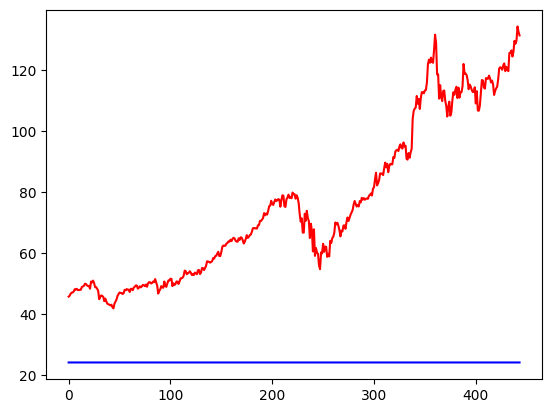

In [12]:
import matplotlib.pyplot as plt
plt.plot(y_test, color='red', label='test')
plt.plot(predicted_prices, color='blue',label='prediction')

In [13]:
predicted_prices.shape

(444, 1)

In [14]:
from keras.models import load_model
import os
print(os.getcwd())

new_model = load_model('./models/"AAPL')

/Users/minsokkwon/Documents/python/stock_analysis/stock_analysis/src


OSError: No file or directory found at ./models/"AAPL

In [22]:
import os

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from dataclasses import dataclass
from tensorflow.keras.layers import Dropout, LSTM, Dense
from src.logger import logging
from src.utils import evaluate_model
from src.utils import plot_prediction
from src.exception_handler import CustomException
from sklearn.preprocessing import MinMaxScaler

In [24]:
print(os.getcwd())

/Users/minsokkwon/Documents/python/stock_analysis/stock_analysis/src


In [25]:

from src.data_management.model_trainer import ModelTrainerConfig, ModelTrainer, split_Xy
from src.utils import evaluate_model , plot_prediction
model_trainer_config = ModelTrainerConfig()
model_train  = ModelTrainer("AAPL")
model  = model_train.train_model(epochs = 20)


Epoch 1/20
61/61 - 5s - loss: 0.0087 - r2_score: 0.8418 - 5s/epoch - 74ms/step
Epoch 2/20
61/61 - 3s - loss: 9.0822e-04 - r2_score: 0.9835 - 3s/epoch - 51ms/step
Epoch 3/20
61/61 - 3s - loss: 8.1545e-04 - r2_score: 0.9852 - 3s/epoch - 51ms/step
Epoch 4/20
61/61 - 3s - loss: 8.2847e-04 - r2_score: 0.9850 - 3s/epoch - 53ms/step
Epoch 5/20
61/61 - 3s - loss: 7.1798e-04 - r2_score: 0.9870 - 3s/epoch - 51ms/step
Epoch 1/20
61/61 - 4s - loss: 0.0123 - r2_score: 0.7762 - 4s/epoch - 71ms/step
Epoch 2/20
61/61 - 3s - loss: 8.8279e-04 - r2_score: 0.9840 - 3s/epoch - 51ms/step
Epoch 3/20
61/61 - 3s - loss: 8.4168e-04 - r2_score: 0.9847 - 3s/epoch - 51ms/step
Epoch 4/20
61/61 - 3s - loss: 8.4576e-04 - r2_score: 0.9847 - 3s/epoch - 51ms/step
Epoch 5/20
61/61 - 3s - loss: 7.4563e-04 - r2_score: 0.9865 - 3s/epoch - 51ms/step


In [17]:
X_train, y_train = split_Xy(model_train.train_df, window_size = 60)
X_test , y_test = split_Xy(model_train.test_df , window_size= 60)

NameError: name 'split_Xy' is not defined

In [ ]:
prediction = model.predict(X_test)
plot_prediction(model_train.scaler.inverse_transform(y_test), model_train.scaler.inverse_transform(prediction))

In [1]:
scaler = model_train.scaler

NameError: name 'model_train' is not defined

In [56]:
X_test[0,:,:]

array([[37.84503555],
       [34.07539749],
       [35.530056  ],
       [35.45097351],
       [36.12677002],
       [36.74026108],
       [36.85770416],
       [36.49583054],
       [35.94704056],
       [36.68276215],
       [37.13089371],
       [37.35136795],
       [37.58143234],
       [36.73786545],
       [36.88645554],
       [36.59407425],
       [37.80669022],
       [37.45681381],
       [37.06858063],
       [39.60165024],
       [39.88684082],
       [39.90600586],
       [41.03953171],
       [41.74169922],
       [41.75608444],
       [40.96524429],
       [41.01338196],
       [40.77751923],
       [41.12890625],
       [40.95801926],
       [41.1072464 ],
       [41.01577759],
       [41.13852692],
       [41.40327454],
       [41.16981506],
       [41.62949753],
       [41.93275833],
       [41.95682907],
       [42.08678436],
       [41.67282104],
       [42.1108551 ],
       [42.32264709],
       [42.24562836],
       [42.00255203],
       [41.51638794],
       [41